# $LiClO_{4}$ in DI Transmission Scans

In [2]:
# Import Libraries

import matplotlib.pyplot as plt  # For plotting
import numpy as np  # For numerical operations and trendlines
from scipy.stats import linregress  # For linear trendlines 
import pandas as pd # For reading excel files
import csv #for reading txt files

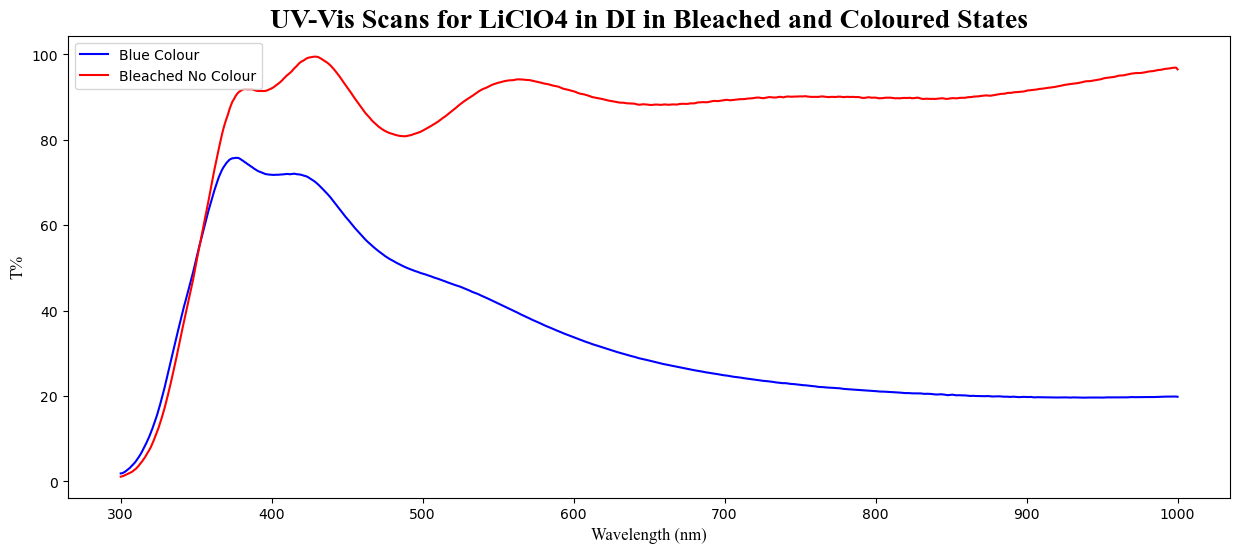

In [16]:
# Specify the full or relative file path
file_pathColour = r'C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\Transmission\Water- Li\LiClO4 in DI 20mVs Colour.txt'  
file_pathBleached = r'C:\Users\w19004417\OneDrive - Northumbria University - Production Azure AD\Level 6\KD6040 Diss\Python\Water\Transmission\Water- Li\LiClO4 in DI 20mVs Bleached.txt'  

# Function to read data from a file and return x and y lists
def read_data(file_path):
    x_values = []
    y_values = []
    
    with open(file_path, mode='r') as file:
        reader = csv.DictReader(file)

         # Strip spaces from headers
        reader.fieldnames = [field.strip() for field in reader.fieldnames]
        
        for row in reader:
            x_values.append(float(row['Wavelength nm.']))
            y_values.append(float(row['T%']))
            
    
        
    return x_values, y_values

# Read data from both files
x1, y1 = read_data(file_pathColour)
x2, y2 = read_data(file_pathBleached)


# Plot the data from both files on the same graph
plt.figure(figsize=(15, 6))
plt.plot(x1, y1, label='Blue Colour', color='blue')  # Data from the first file
plt.plot(x2, y2, label='Bleached No Colour', color='red')   # Data from the second file

# Add labels and title
plt.xlabel('Wavelength (nm)',fontsize=12, fontname="Times New Roman", fontweight="medium")
plt.ylabel('T%',fontsize=12, fontname="Times New Roman", fontweight="medium")
plt.title('UV-Vis Scans for LiClO4 in DI in Bleached and Coloured States',fontsize=20, fontname="Times New Roman", fontweight="bold")
plt.legend()

# Show the plot
plt.show()
#plt.savefig("LiClO4 in DI UV-Vis Scans.png")

In [4]:
with open(file_pathColour, mode='r') as file:
    reader = csv.reader(file)
    header = next(reader)  # Get the first row (the header)
    print(header)  # Print the headers to check their exact names

['Wavelength nm.', 'T%']


# Find $\Delta$T come back to this, not clear

In [6]:
from scipy.interpolate import interp1d

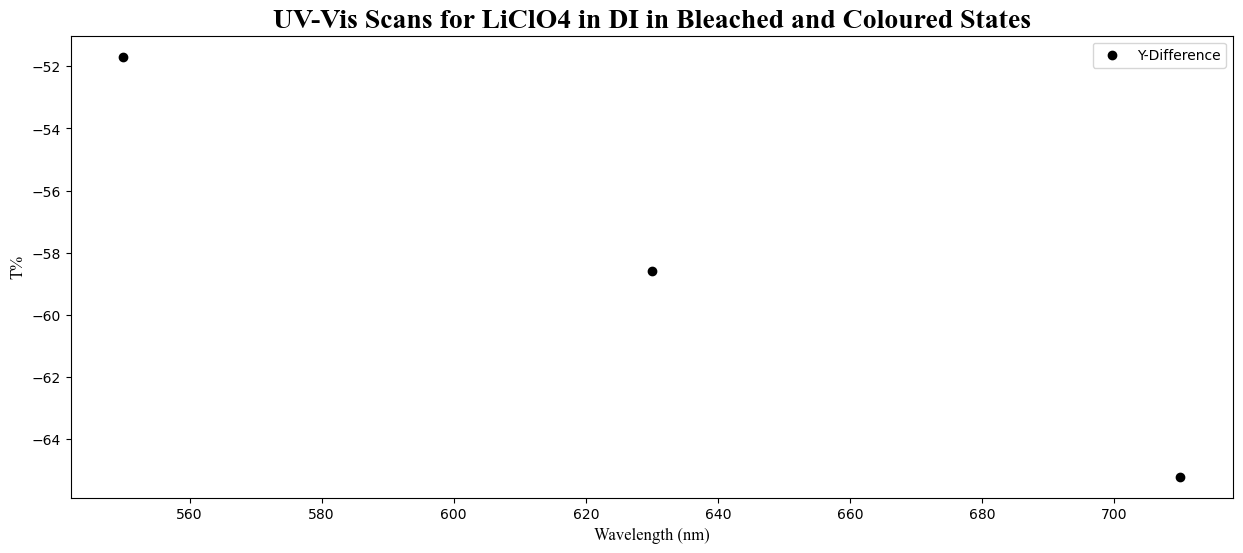

In [18]:
# Plot the data from both files on the same graph
plt.figure(figsize=(15, 6))
#plt.plot(x1, y1, label='Blue Colour', color='blue')  # Data from the first file
#plt.plot(x2, y2, label='Bleached No Colour', color='red')   # Data from the second file

# Define specific x-coordinates where you want to find the difference
x_specific = np.array([550, 630, 710]) 

#Interpolation to match x values if necessary
f1 = interp1d(x1, y1, kind = "linear", fill_value = "extrapolate")
f2 = interp1d(x2, y2, kind = "linear", fill_value = "extrapolate")

# Compute interpolated y-values
y1_interp = f1(x_specific)
y2_interp = f2(x_specific)

# Compute the difference
y_diff = y1_interp - y2_interp

# Plot the difference points on the same graph
plt.scatter(x_specific, y_diff, color="black", marker="o", label="Y-Difference")

# Add labels and title
plt.xlabel('Wavelength (nm)',fontsize=12, fontname="Times New Roman", fontweight="medium")
plt.ylabel('T%',fontsize=12, fontname="Times New Roman", fontweight="medium")
plt.title('UV-Vis Scans for LiClO4 in DI in Bleached and Coloured States',fontsize=20, fontname="Times New Roman", fontweight="bold")
plt.legend()

# Show the plot
plt.show()
#plt.savefig("LiClO4 in DI UV-Vis Scans.png")